In [2]:
# ファイルのダウンロード
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
from gensim.models import KeyedVectors

--2022-02-28 05:02:22--  https://docs.google.com/uc?export=download&confirm=t&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kj0kp3fef3rh3gbtrr9dmuibi57qbvkg/1646024475000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2022-02-28 05:02:22--  https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kj0kp3fef3rh3gbtrr9dmuibi57qbvkg/1646024475000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleuse

In [3]:
# ==============
# 60. 単語ベクトルの読み込みと表示
# ==============

# 単語ベクトルの読み込み
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary=True)
# 表示
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [5]:
# ==============
# 61. 単語の類似度
# ==============

print("cos(United States, U.S.) = %1.3f" % model.similarity("United_States", "U.S."))

cos(United States, U.S.) = 0.731


In [7]:
# ==============
# 62. 類似度の高い単語10件
# ==============

results = model.most_similar('United_States', topn = 10)
for result in results:
    print(result)

('Unites_States', 0.7877248525619507)
('Untied_States', 0.7541370391845703)
('United_Sates', 0.74007248878479)
('U.S.', 0.7310774326324463)
('theUnited_States', 0.6404393911361694)
('America', 0.6178410053253174)
('UnitedStates', 0.6167312264442444)
('Europe', 0.6132988929748535)
('countries', 0.6044804453849792)
('Canada', 0.6019070148468018)


In [8]:
# ==============
# 63. 加法構成性によるアナロジー
# ==============

results = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
for result in results:
    print(result)

('Greece', 0.6898481249809265)
('Aristeidis_Grigoriadis', 0.5606848001480103)
('Ioannis_Drymonakos', 0.5552908778190613)
('Greeks', 0.545068621635437)
('Ioannis_Christou', 0.5400862693786621)
('Hrysopiyi_Devetzi', 0.5248444676399231)
('Heraklio', 0.5207759737968445)
('Athens_Greece', 0.516880989074707)
('Lithuania', 0.5166866183280945)
('Iraklion', 0.5146791934967041)


In [9]:
# 単語アナロジーの評価データをダウンロード
! wget http://download.tensorflow.org/data/questions-words.txt

--2022-02-28 05:23:24--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.199.128, 2607:f8b0:400e:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.199.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2022-02-28 05:23:24 (259 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [11]:
# ==============
# 64. アナロジーデータでの実験
# ==============

with open("/content/questions-words.txt", "r") as f1, open("/content/questions-words-add.txt", "w") as f2:
    for line in f1:
        line = line.split()
        if line[0] == ":":
            category = line[1]
        else:
            word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [12]:
! cp /content/questions-words-add.txt "/content/drive/MyDrive/Colab Notebooks/言語処理100本ノック2020/第7章"

In [17]:
# ==============
# 65. アナロジータスクでの正解率
# ==============

with open("/content/questions-words-add.txt", "r") as f:
    semTotalCnt = 0
    semCnt = 0
    synTotalCnt = 0
    synCnt = 0
    for line in f:
        line = line.split()
        if not line[0].startswith("gram"):
            semTotalCnt += 1
            if line[4] == line[5]:
                semCnt += 1
        else:
            synTotalCnt += 1
            if line[4] == line[5]:
                synCnt += 1
print(f'意味的アナロジー正解率: {semCnt/semTotalCnt:.3f}')
print(f'文法的アナロジー正解率: {synCnt/synTotalCnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


In [14]:
# The WordSimilarity-353 Test Collectionの評価データをダウンロード
! wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
! unzip /content/wordsim353.zip

--2022-02-28 08:56:55--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.07s   

2022-02-28 08:56:55 (330 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  /content/wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [16]:
# ==============
# 66. WordSimilarity-353での評価
# ==============

# 単語ベクトルによる類似度の計算
cosList = []
with open('/content/combined.csv', 'r') as f:
    next(f) # 最初の一文をスキップ
    for line in f:
        line = [word.strip() for word in line.split(',')]
        line.append(model.similarity(line[0], line[1]))
        cosList.append(line)
# 類似度の大きい順に並び替え
cosList = sorted(cosList, key=lambda x: x[-1], reverse = True)
for i in range(10):
    print(cosList[i])

import numpy as np
from scipy.stats import spearmanr
# スピアマン相関係数の計算
human = np.array(cosList).T[2]
w2v = np.array(cosList).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

['tiger', 'tiger', '10.00', 0.99999994]
['Harvard', 'Yale', '8.13', 0.7817696]
['man', 'woman', '8.30', 0.76640123]
['football', 'soccer', '9.03', 0.73135483]
['mile', 'kilometer', '8.66', 0.7258478]
['vodka', 'brandy', '8.13', 0.6881493]
['journey', 'voyage', '9.29', 0.68308526]
['football', 'basketball', '6.81', 0.66824675]
['type', 'kind', '8.97', 0.6666412]
['championship', 'tournament', '8.36', 0.6655317]
スピアマン相関係数: 0.685


In [18]:
# ==============
# 67. k-meansクラスタリング
# ==============

countries = set()
with open('/content/questions-words-add.txt', 'r') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Australia, Peru, Jamaica, Colombia, Belize, Cuba, Dominica, Uruguay, Ecuador, Brazil, Venezuela, Honduras, Philippines, USA, England, Suriname, Bahamas, Samoa, Mexico, Argentina, Tuvalu, Canada, Guyana, Fiji, Greenland, Chile, Nicaragua
cluster 1
Ireland, Portugal, Cyprus, Montenegro, Italy, Slovakia, Albania, Latvia, Sweden, Romania, Serbia, Poland, Slovenia, Liechtenstein, Netherlands, France, Germany, Switzerland, Europe, Hungary, Malta, Estonia, Bulgaria, Iceland, Greece, Norway, Lithuania, Belgium, Spain, Croatia, Finland, Austria, Macedonia, Denmark, Turkey
cluster 2
Gambia, Namibia, Sudan, Malawi, Nigeria, Guinea, Angola, Uganda, Zambia, Tunisia, Algeria, Somalia, Rwanda, Mauritania, Burundi, Madagascar, Niger, Kenya, Ghana, Eritrea, Mozambique, Gabon, Senegal, Liberia, Mali, Botswana, Zimbabwe
cluster 3
Georgia, Uzbekistan, Russia, Kazakhstan, Moldova, Turkmenistan, Azerbaijan, Ukraine, Armenia, Kyrgyzstan, Tajikistan, Belarus
cluster 4
Korea, India, Morocco, Thailand

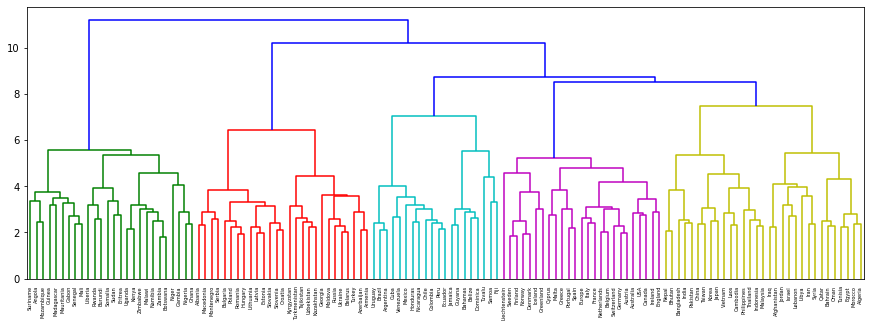

In [19]:
# ==============
# 68. Ward法によるクラスタリング
# ==============

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

In [20]:
! pip install bhtsne

     |████████████████████████████████| 86 kB 3.0 MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp37-cp37m-linux_x86_64.whl size=215083 sha256=b3cd1d9d098a4fe20559fe9e7f2d3ff714e48d2380c02f9a0b8059de92e84c78
  Stored in directory: /root/.cache/pip/wheels/e4/4c/71/26b7b0736d179d6bfe9d753629955515bf7ba7c1c8a8d98cb4
Successfully built bhtsne


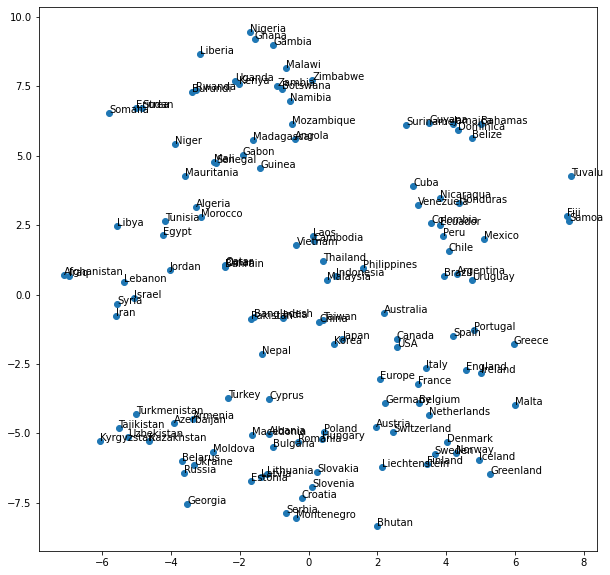

In [21]:
# ==============
# 69. t-SNEによる可視化
# ==============
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()